"""

Edyta Bartoś i Marcin Grelewicz, 

usage of red and white data from: 
https://machinelearningmastery.com/standard-machine-learning-datasets/, 
for building the classifier SVM-> Support Vector Machine, which is commonly 
used for supervised learning to analyze data and recognize patterns, by dividing
data on hyperplane with maximum margin possible. 

Two datasets have 12 atribute informations, icluding quality, which is our reference. 
More info about atributes of wine here: http://archive.ics.uci.edu/ml/datasets/Wine+Quality

"""

In [65]:
# Import Required Libraries 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

In [66]:
# Read in white wine data 
data_red = pd.read_csv('winequality-red.csv', sep= ";") 
  
# Read in red wine data 
data_white = pd.read_csv('winequality-white.csv', sep= ";") 

In [67]:
# show sample of data
data_red.sample(5) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1179,8.2,0.350,0.33,2.4,0.076,11.0,47.0,0.99599,3.27,0.81,11.0,6
292,10.4,0.550,0.23,2.7,0.091,18.0,48.0,0.99940,3.22,0.64,10.3,6
1165,8.5,0.440,0.50,1.9,0.369,15.0,38.0,0.99634,3.01,1.10,9.4,5
1075,9.1,0.250,0.34,2.0,0.071,45.0,67.0,0.99769,3.44,0.86,10.2,7
710,10.6,1.025,0.43,2.8,0.080,21.0,84.0,0.99850,3.06,0.57,10.1,5


In [68]:
# Add `type` column to `red` with price one 
data_red['type'] = 1

# Add `type` column to `white` with price zero 
data_white['type'] = 0

# Append `white` to `red` 
all_data = data_red.append(data_white, ignore_index = True) 

In [69]:
all_data.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [70]:
# Import `train_test_split` from `sklearn.model_selection` 
from sklearn.model_selection import train_test_split 
#splitting data to X ve y
#X = all_data.drop(['quality', 'type'], axis = 1)
y = np.ravel(all_data.type)
X = all_data.iloc[:, 0:11] 
#y = np.ravel(all_data.type) 

# Splitting the data set for training and validating 
X_train, X_test, y_train, y_test = train_test_split( 
		X, y, test_size = 0.25, random_state = 50) 

In [71]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3419,6.8,0.300,0.35,2.8,0.038,10.0,164.0,0.99120,3.09,0.53,12.0
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
5340,7.0,0.150,0.28,14.7,0.051,29.0,149.0,0.99792,2.96,0.39,9.0
6363,5.9,0.260,0.29,5.4,0.046,34.0,116.0,0.99224,3.24,0.41,11.4
3916,7.5,0.240,0.62,10.6,0.045,51.0,153.0,0.99779,3.16,0.44,8.8


In [72]:
# Feature Scaling to X_train and X_test to classify better.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [73]:
print(X_test)

[[-0.32720953 -0.24001931  0.20823543 ... -0.79850638 -0.01962105
   1.28457767]
 [ 1.21241413  2.07331226 -0.40695842 ...  0.63590954 -0.41627564
  -0.91731411]
 [-0.17324716 -1.14131733 -0.27024867 ... -1.6092632  -0.94514842
  -1.25606669]
 ...
 [-0.55815308 -0.72071159 -0.2018938  ... -0.42431092  0.17870624
   0.35300807]
 [-0.86607781  0.12049989 -0.40695842 ... -0.9856041  -1.7384576
   2.13145913]
 [ 0.75052703 -0.36019238  0.55000979 ...  0.69827545  1.10423362
   1.96208284]]


In [74]:
# Import `Sequential` from `keras.models` 
from keras.models import Sequential 

# Import `Dense` from `keras.layers` 
from keras.layers import Dense 

# Initialize the constructor 
model = Sequential() 

# Add an input layer 
model.add(Dense(12, activation ='relu', input_shape =(11, ))) 

# Add one hidden layer 
model.add(Dense(9, activation ='relu')) 

# Add an output layer 
#model.add(Dense(1, activation ='sigmoid')) 

# Model output shape 
model.output_shape

# Model summary 
model.summary()

# Model config 
model.get_config() 

# List all weight tensors 
model.get_weights() 
model.compile(loss ='binary_crossentropy', 
optimizer ='adam', metrics =['accuracy']) 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_9 (Dense)              (None, 9)                 117       
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [75]:
from datetime import datetime
import tensorflow as tf

from tensorflow import keras

from matplotlib import pyplot as plt
history = model.fit(X_train, y_train, validation_split = 0.5, epochs=6, batch_size=1)

# Predicting the Value 
y_pred = model.predict(X_test) 
print(y_pred) 

Epoch 1/6
2436/2436 [==============================] - 4s 2ms/step - loss: 1.8395 - accuracy: 0.2425 - val_loss: 0.6486 - val_accuracy: 0.5981
Epoch 2/6
2436/2436 [==============================] - 4s 2ms/step - loss: 0.5700 - accuracy: 0.6345 - val_loss: 0.5223 - val_accuracy: 0.6753
Epoch 3/6
2436/2436 [==============================] - 4s 2ms/step - loss: 0.5159 - accuracy: 0.6828 - val_loss: 0.4995 - val_accuracy: 0.7102
Epoch 4/6
2436/2436 [==============================] - 4s 2ms/step - loss: 0.4818 - accuracy: 0.7209 - val_loss: 0.4890 - val_accuracy: 0.7237
Epoch 5/6
2436/2436 [==============================] - 4s 2ms/step - loss: 0.5359 - accuracy: 0.7274 - val_loss: 0.4854 - val_accuracy: 0.7303
Epoch 6/6
2436/2436 [==============================] - 4s 2ms/step - loss: 0.4536 - accuracy: 0.7485 - val_loss: 0.4862 - val_accuracy: 0.7291
[[0.        0.        0.        ... 0.        0.        0.       ]
 [2.5495636 2.5313733 2.5669098 ... 3.0034468 2.7150295 3.0866833]
 [0.    

Here we are going to see 1 model without activator "sigmoid". We are using only RELU with 21 layers.

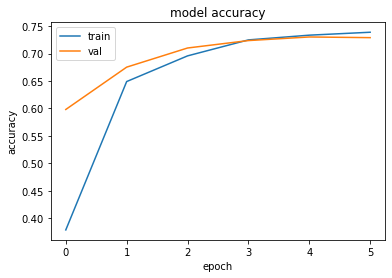

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

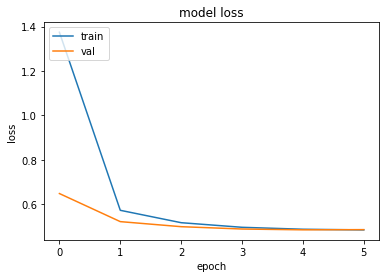

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [78]:
# Import `Sequential` from `keras.models` 
from keras.models import Sequential 

# Import `Dense` from `keras.layers` 
from keras.layers import Dense 

# Initialize the constructor 
model = Sequential() 

# Add an input layer 
model.add(Dense(12, activation ='relu', input_shape =(11, ))) 

# Add one hidden layer 
#model.add(Dense(9, activation ='relu')) 

# Add an output layer 
model.add(Dense(1, activation ='sigmoid')) 

# Model output shape 
model.output_shape

# Model summary 
model.summary()

# Model config 
model.get_config() 

# List all weight tensors 
model.get_weights() 
model.compile(loss ='binary_crossentropy', 
optimizer ='adam', metrics =['accuracy']) 

from datetime import datetime
import tensorflow as tf

from tensorflow import keras

from matplotlib import pyplot as plt
history = model.fit(X_train, y_train, validation_split = 0.5, epochs=6, batch_size=1)

# Predicting the Value 
y_pred = model.predict(X_test) 
print(y_pred) 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 12)                144       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 13        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6
2436/2436 [==============================] - 5s 2ms/step - loss: 0.3126 - accuracy: 0.8817 - val_loss: 0.0478 - val_accuracy: 0.9893
Epoch 2/6
2436/2436 [==============================] - 4s 2ms/step - loss: 0.0459 - accuracy: 0.9855 - val_loss: 0.0322 - val_accuracy: 0.9930
Epoch 3/6
2436/2436 [==============================] - 4s 2ms/step - loss: 0.0299 - accuracy: 0.9945 - val_loss: 0.0285 - val_accuracy: 0.9947
Epoch 4/6
2436/2436 [==============================] - 4s 2ms/step - loss: 0.0428 - accur

In [ ]:
Here we are going to see 1 model without 1 activator "RELU", but we are adding "sigmoid" instead. Model has 13 layers.

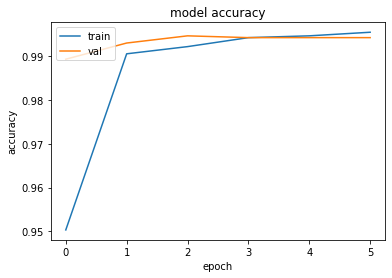

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

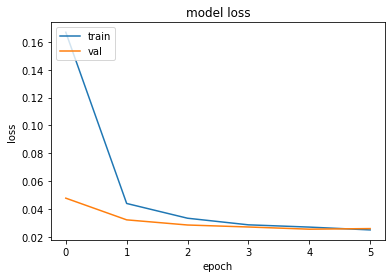

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()